<h1>Sobre el conjunto de datos model.txt</h1>

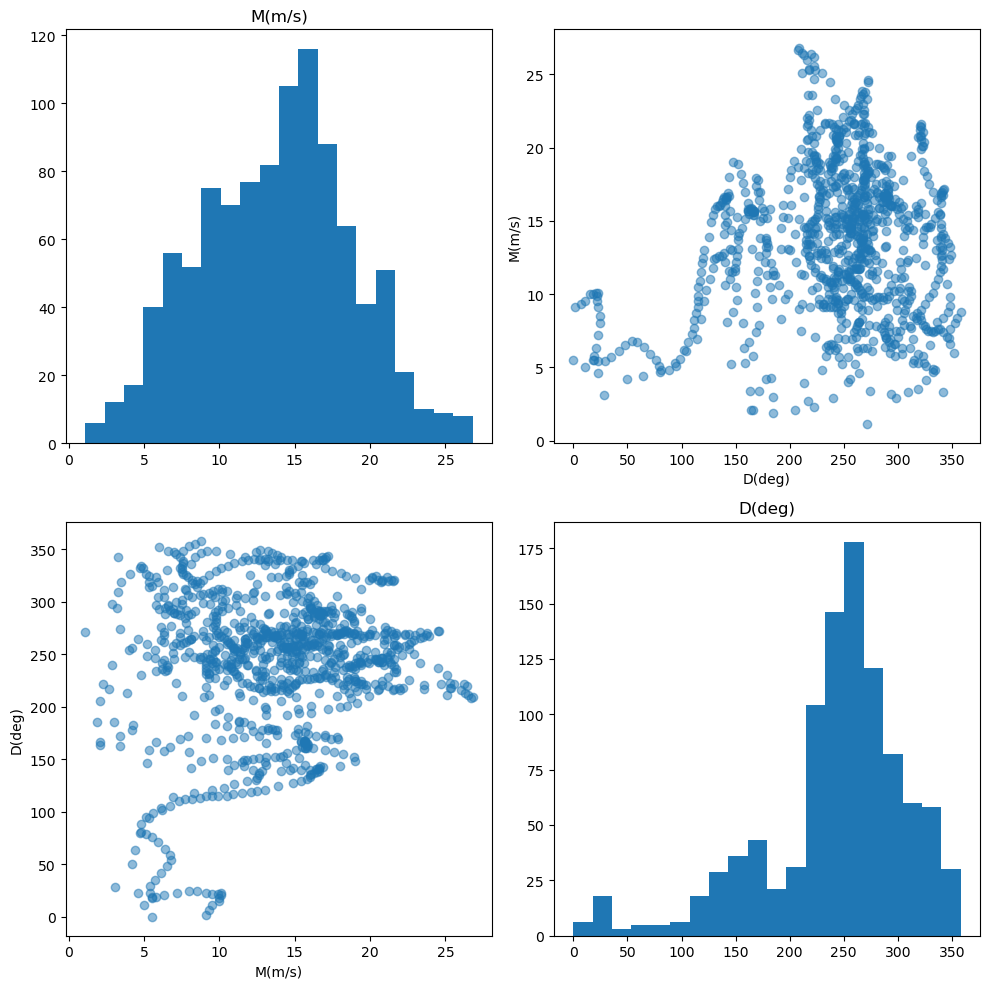

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos y seleccionar los primeros mil registros
df = pd.read_table('model.txt', sep='\s+', skiprows=3).head(1000)

# Crear la matriz de dispersión
columns = ['M(m/s)', 'D(deg)']
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Diagonal: Histogramas
for i, col in enumerate(columns):
    axes[i, i].hist(df[col], bins=20)
    axes[i, i].set_title(col)

# Fuera de la diagonal: Gráficos de dispersión
axes[0, 1].scatter(df[columns[1]], df[columns[0]], alpha=0.5)
axes[0, 1].set(xlabel=columns[1], ylabel=columns[0])

axes[1, 0].scatter(df[columns[0]], df[columns[1]], alpha=0.5)
axes[1, 0].set(xlabel=columns[0], ylabel=columns[1])

plt.tight_layout()
plt.show()

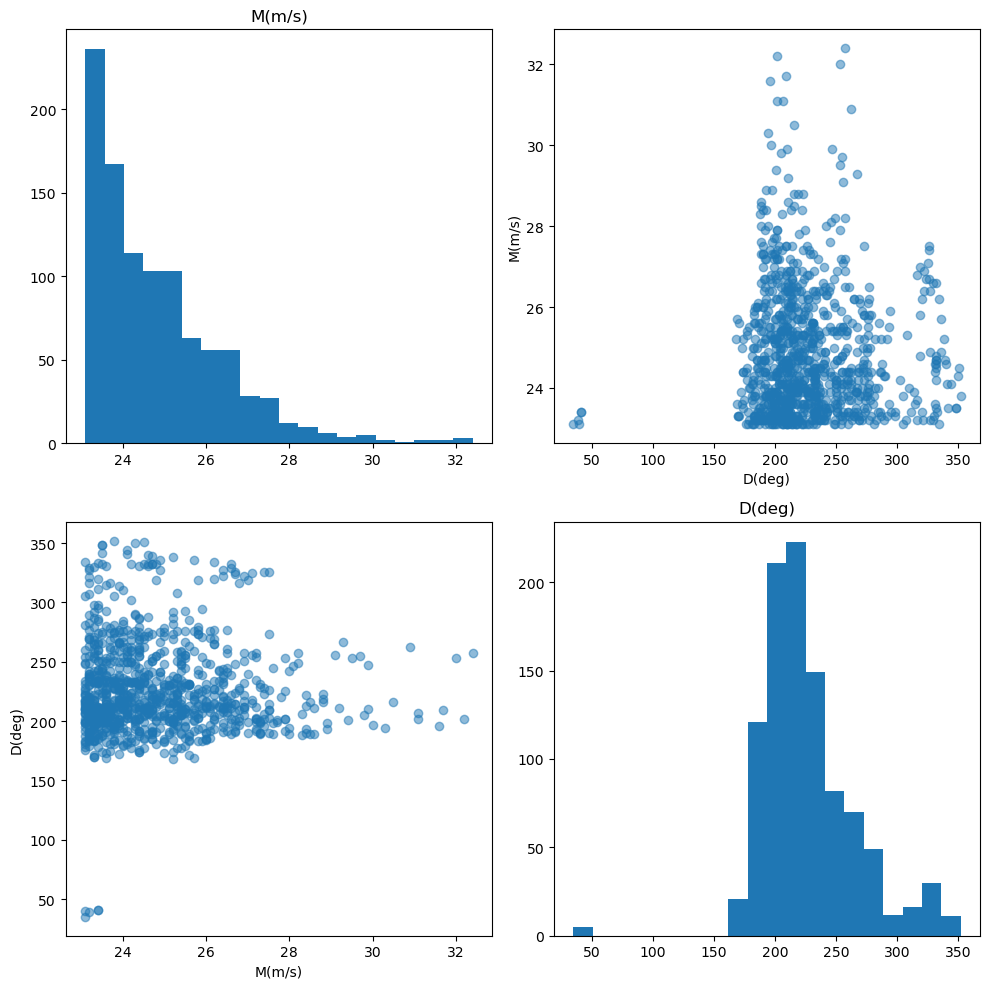

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_table('model.txt', sep='\s+', skiprows=3)

# Ordenar por la columna de velocidad del viento en orden descendente y seleccionar los primeros 1000 registros
df_sorted = df.sort_values(by='M(m/s)', ascending=False).head(1000)

# Crear la matriz de dispersión
columns = ['M(m/s)', 'D(deg)']

plt.figure(figsize=(10, 10))

# Diagonal: Histogramas
plt.subplot(2, 2, 1)
plt.hist(df_sorted[columns[0]], bins=20)
plt.title(columns[0])

plt.subplot(2, 2, 4)
plt.hist(df_sorted[columns[1]], bins=20)
plt.title(columns[1])

# Fuera de la diagonal: Gráficos de dispersión
plt.subplot(2, 2, 2)
plt.scatter(df_sorted[columns[1]], df_sorted[columns[0]], alpha=0.5)
plt.xlabel(columns[1])
plt.ylabel(columns[0])

plt.subplot(2, 2, 3)
plt.scatter(df_sorted[columns[0]], df_sorted[columns[1]], alpha=0.5)
plt.xlabel(columns[0])
plt.ylabel(columns[1])

plt.tight_layout()
plt.show()

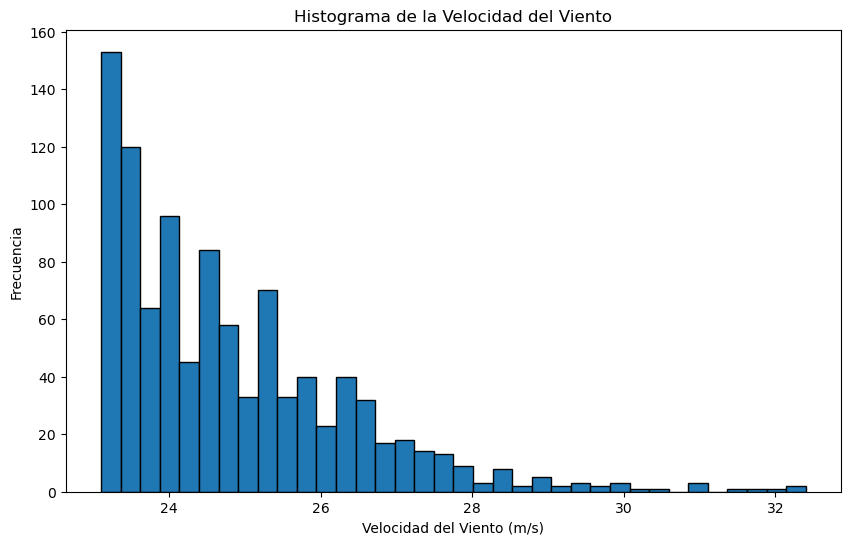

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_table('model.txt', sep='\s+', skiprows=3)

# Ordenar por la columna de velocidad del viento en orden descendente y seleccionar los primeros 1000 registros
df_sorted = df.sort_values(by='M(m/s)', ascending=False).head(1000)

# Crear el histograma de la velocidad del viento con 36 particiones
plt.figure(figsize=(10, 6))
plt.hist(df_sorted['M(m/s)'], bins=36, edgecolor='black')
plt.title('Histograma de la Velocidad del Viento')
plt.xlabel('Velocidad del Viento (m/s)')
plt.ylabel('Frecuencia')
plt.show()

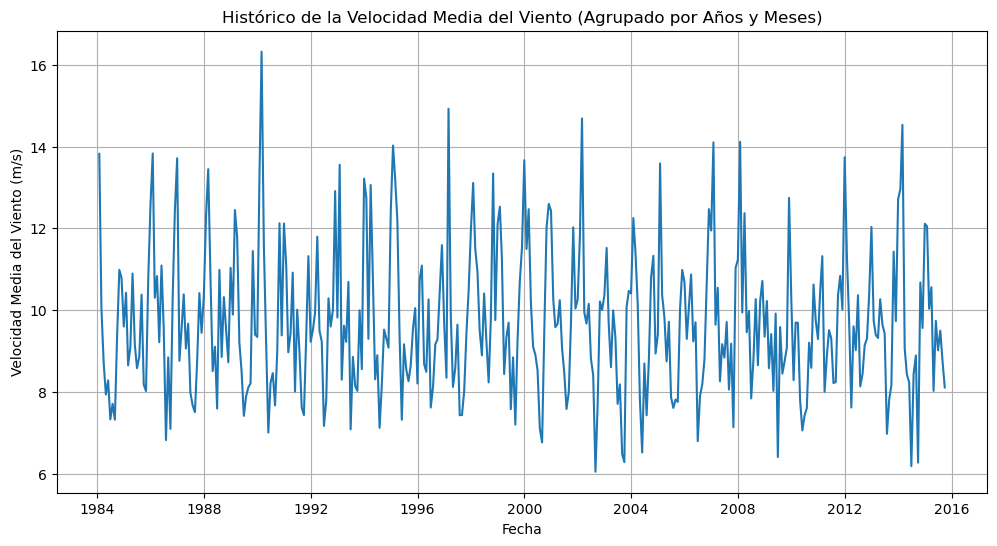

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_table('model.txt', sep='\s+', skiprows=3)

# Asegurarse de que la columna HHMM tenga siempre 4 dígitos
df['HHMM'] = df['HHMM'].apply(lambda x: f'{int(x):04d}')

# Convertir la columna de fecha y hora a un objeto datetime
df['datetime'] = pd.to_datetime(df['YYYYMMDD'].astype(str) + df['HHMM'].astype(str), format='%Y%m%d%H%M')

# Establecer la columna datetime como índice
df.set_index('datetime', inplace=True)

# Agrupar por año y mes y calcular la velocidad media del viento
df['M(m/s)'] = pd.to_numeric(df['M(m/s)'], errors='coerce')
df_monthly_mean = df['M(m/s)'].resample('M').mean()

# Crear el gráfico del histórico de la velocidad media del viento
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_mean)
plt.title('Histórico de la Velocidad Media del Viento (Agrupado por Años y Meses)')
plt.xlabel('Fecha')
plt.ylabel('Velocidad Media del Viento (m/s)')
plt.grid(True)
plt.show()

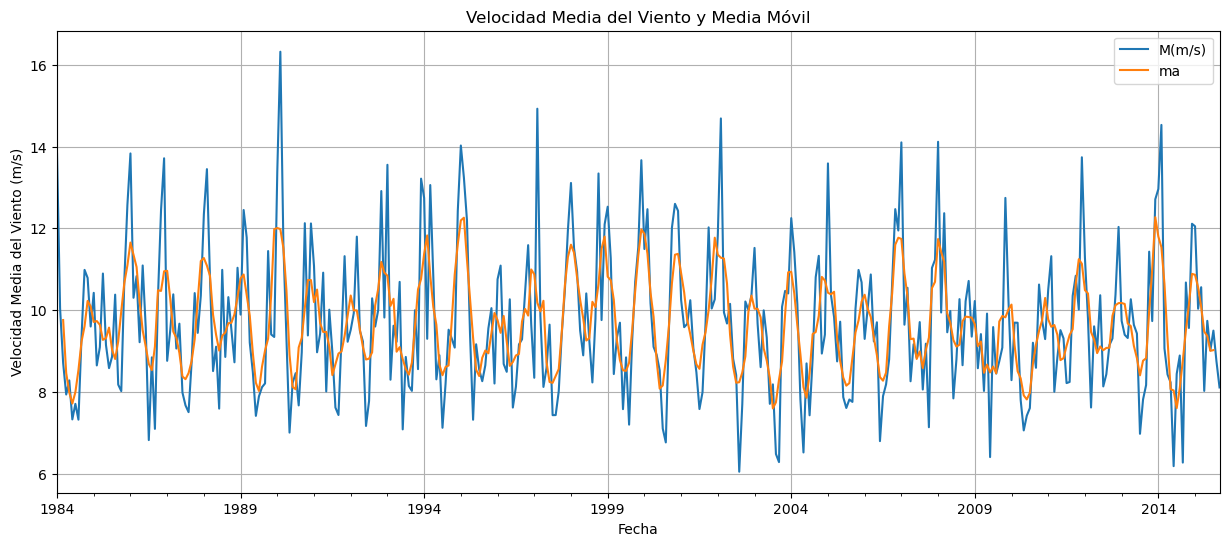

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos y procesar las columnas
df = pd.read_table('model.txt', sep='\s+', skiprows=3)
df['datetime'] = pd.to_datetime(df['YYYYMMDD'].astype(str) + df['HHMM'].apply(lambda x: f'{int(x):04d}'), format='%Y%m%d%H%M')
df.set_index('datetime', inplace=True)
df['M(m/s)'] = pd.to_numeric(df['M(m/s)'], errors='coerce')

# Agrupar por año y mes, calcular la media y la media móvil
monthly = df.resample('M').mean()
monthly['ma'] = monthly['M(m/s)'].rolling(5, center=True).mean()

# Graficar las velocidades medias del viento y la media móvil
monthly[['M(m/s)', 'ma']].plot(figsize=(15, 6))
plt.title('Velocidad Media del Viento y Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Velocidad Media del Viento (m/s)')
plt.grid(True)
plt.show()

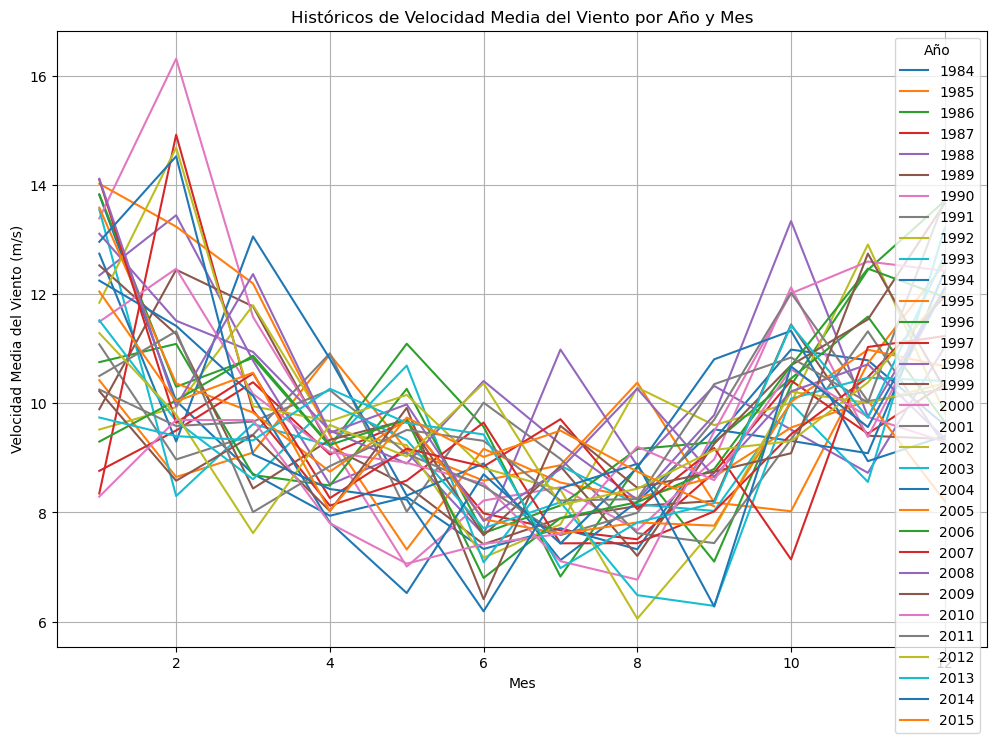

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_table('model.txt', sep='\s+', skiprows=3)

# Asegurarse de que la columna HHMM tenga siempre 4 dígitos
df['HHMM'] = df['HHMM'].apply(lambda x: f'{int(x):04d}')

# Convertir la columna de fecha y hora a un objeto datetime
df['datetime'] = pd.to_datetime(df['YYYYMMDD'].astype(str) + df['HHMM'].astype(str), format='%Y%m%d%H%M')

# Establecer la columna datetime como índice
df.set_index('datetime', inplace=True)

# Agrupar por año y mes y calcular la velocidad media del viento
df['M(m/s)'] = pd.to_numeric(df['M(m/s)'], errors='coerce')
df_monthly_mean = df['M(m/s)'].resample('M').mean()

# Crear una tabla de velocidades medias en función del año y del mes
df_pivot = df_monthly_mean.reset_index()
df_pivot['Year'] = df_pivot['datetime'].dt.year
df_pivot['Month'] = df_pivot['datetime'].dt.month
pivot_table = df_pivot.pivot_table(values='M(m/s)', index='Year', columns='Month', aggfunc='mean')

# Graficar los históricos de cada año, agrupados por meses, superpuestos
plt.figure(figsize=(12, 8))
for year in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[year], label=year)

plt.title('Históricos de Velocidad Media del Viento por Año y Mes')
plt.xlabel('Mes')
plt.ylabel('Velocidad Media del Viento (m/s)')
plt.legend(title='Año')
plt.grid(True)
plt.show()